In [44]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [50]:
# loading data
train_data = np.load('train_data.npz')

# train data
train_features = train_data['features']
train_domains = train_data['domains']
train_digits = train_data['digits']

test_data = np.load('test_data.npz')

# test data
test_features = test_data['features']
test_domains = test_data['domains']
test_digits = test_data['digits']

domain_tags = np.unique(train_domains)

# specific label train data
tag_train_features_dic = {}
tag_train_domains_dic = {}
tag_train_digits_dic = {}

for tag in domain_tags:
    tag_mask = train_domains == tag
    
    tag_train_features = train_features[tag_mask]
    tag_train_domains = train_domains[tag_mask]
    tag_train_digits = train_digits[tag_mask]
    
    tag_train_features_dic[tag] = tag_train_features
    tag_train_domains_dic[tag] = tag_train_domains
    tag_train_digits_dic[tag] = tag_train_digits

# specific label test data
tag_test_features_dic = {}
tag_test_domains_dic = {}
tag_test_digits_dic = {}

    
for tag in domain_tags:
    tag_mask = test_domains == tag
        
    tag_test_features = test_features[tag_mask]
    tag_test_domains = test_domains[tag_mask]
    tag_test_digits = test_digits[tag_mask]
    
    tag_test_features_dic[tag] = tag_test_features
    tag_test_domains_dic[tag] = tag_test_domains
    tag_test_digits_dic[tag] = tag_test_digits
    
# other used parameters
models_destination = 'trained_models/'
train_elapsed_time_threshold = 5
converge_accuracy_difference = 0.002

In [48]:
# model save function
def save_clf (model, name, n_estimators, min_samples_split):
    pickle.dump(model, open(f'{models_destination}{name}_{n_estimators}_estimators_{min_samples_split}_min_samples_split.pickle', 'wb'))

# TRAINING DOMAIN CLASSIFIER ON THE ENTIRE TEST DATA

In [52]:
# looking for the best range of n_estimators hyperparameter in the range of (1, 1000)
prev_score = 0

for i in range(1, 1000, 50):
    # clf model
    domain_clf = RandomForestClassifier(n_estimators=i, random_state=123)
    
    start_time = time.time()
    domain_clf.fit(train_features, train_domains)
    end_time = time.time()
    elapsed_time = int((end_time - start_time) / 60)
    
    # clf test
    test_domains_predict = domain_clf.predict(test_features)
    score = f1_score(test_domains, test_domains_predict, average='weighted')
    
    print(f'clf with n_estimators = {i}, trained in ({elapsed_time}) minutes, accuracy = {score}')
    
    # saving model
    save_clf(domain_clf, 'domain_clf', n_estimators=i, min_samples_split=2)
    
    # checking whether time to train the model exeeds the limit
    # or the training has converged increasing this hyperparameter
    score_dif = score - prev_score
    
    if((elapsed_time >= train_elapsed_time_threshold) or (score_dif < converge_accuracy_difference)):
        break
        
    prev_score = score
print('---done training---')

clf with n_estimators = 1, trained in (0) minutes, accuracy = 0.7063298861057562
clf with n_estimators = 51, trained in (0) minutes, accuracy = 0.9298673248023587
clf with n_estimators = 101, trained in (1) minutes, accuracy = 0.9383553510442156
clf with n_estimators = 151, trained in (2) minutes, accuracy = 0.9413688998387325
clf with n_estimators = 201, trained in (3) minutes, accuracy = 0.9425125898927932
---done training---


In [53]:
# looking for the best range of min_samples_split hyperparameter in the range of (1, 1000)
prev_score = 0
chosen_n_estimators = 50

for i in range(2, 1002, 100):
    # clf model
    domain_clf = RandomForestClassifier(n_estimators=chosen_n_estimators, min_samples_split=i, random_state=123)
    
    start_time = time.time()
    domain_clf.fit(train_features, train_domains)
    end_time = time.time()
    elapsed_time = int((end_time - start_time) / 60)
    
    # clf test
    domains_predict = domain_clf.predict(test_features)
    score = f1_score(test_domains, domains_predict, average='weighted')
    
    print(f'clf with min_samples_split = {i}, trained in ({elapsed_time}) minutes, accuracy = {score}')
    
    # saving model
    save_clf(domain_clf, 'domain_clf', n_estimators=chosen_n_estimators, min_samples_split=i)
    
    # checking whether time to train the model exeeds the limit
    # or the training has converged increasing this hyperparameter
    score_dif = score - prev_score
    
    if(elapsed_time >= train_elapsed_time_threshold):
        break
        
    prev_score = score
print('---done training---')

clf with min_samples_split = 2, trained in (0) minutes, accuracy = 0.9299726749943206
clf with min_samples_split = 102, trained in (0) minutes, accuracy = 0.9250707528704757
clf with min_samples_split = 202, trained in (0) minutes, accuracy = 0.9027607706545245
clf with min_samples_split = 302, trained in (0) minutes, accuracy = 0.8757880217445824
clf with min_samples_split = 402, trained in (0) minutes, accuracy = 0.8522558769884252
clf with min_samples_split = 502, trained in (0) minutes, accuracy = 0.8422597625575949
clf with min_samples_split = 602, trained in (0) minutes, accuracy = 0.8237871942823957
clf with min_samples_split = 702, trained in (0) minutes, accuracy = 0.8152256583605124
clf with min_samples_split = 802, trained in (0) minutes, accuracy = 0.8024870979253707
clf with min_samples_split = 902, trained in (0) minutes, accuracy = 0.7913901130380862
---done training---


In [54]:
# looking for the best range of min_samples_split hyperparameter in the range of (1, 100)
prev_score = 0
chosen_n_estimators = 50

for i in range(2, 103, 10):
    # clf model
    domain_clf = RandomForestClassifier(n_estimators=chosen_n_estimators, min_samples_split=i, random_state=123)
    
    start_time = time.time()
    domain_clf.fit(train_features, train_domains)
    end_time = time.time()
    elapsed_time = int((end_time - start_time) / 60)
    
    # clf test
    domains_predict = domain_clf.predict(test_features)
    score = f1_score(test_domains, domains_predict, average='weighted')
    
    print(f'clf with min_samples_split = {i}, trained in ({elapsed_time}) minutes, accuracy = {score}')
    
    # saving model
    save_clf(domain_clf, 'domain_clf', n_estimators=chosen_n_estimators, min_samples_split=i)
    
    # checking whether time to train the model exeeds the limit
    # or the training has converged increasing this hyperparameter
    score_dif = score - prev_score
    
    if(elapsed_time >= train_elapsed_time_threshold):
        break
        
    prev_score = score
print('---done training---')

clf with min_samples_split = 2, trained in (0) minutes, accuracy = 0.9299726749943206
clf with min_samples_split = 12, trained in (0) minutes, accuracy = 0.9315392804245437
clf with min_samples_split = 22, trained in (0) minutes, accuracy = 0.9341933718728388
clf with min_samples_split = 32, trained in (0) minutes, accuracy = 0.9352421625419021
clf with min_samples_split = 42, trained in (0) minutes, accuracy = 0.9375622934113013
clf with min_samples_split = 52, trained in (0) minutes, accuracy = 0.9352928361446022
clf with min_samples_split = 62, trained in (0) minutes, accuracy = 0.9317120457465425
clf with min_samples_split = 72, trained in (0) minutes, accuracy = 0.9331270049733249
clf with min_samples_split = 82, trained in (0) minutes, accuracy = 0.931488283065444
clf with min_samples_split = 92, trained in (0) minutes, accuracy = 0.9294799809542995
clf with min_samples_split = 102, trained in (0) minutes, accuracy = 0.9250707528704757
---done training---


In [55]:
# training a model with most desirable hyperparameters found
n_estimators = 200
min_samples_split = 30
   
domain_clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, random_state=124)

start_time = time.time()
domain_clf.fit(train_features, train_domains)
end_time = time.time()
elapsed_time = int((end_time - start_time) / 60)

save_clf(domain_clf, 'domain_clf', n_estimators=n_estimators, min_samples_split=min_samples_split)

print(f'clf with n_estimators = {n_estimators}, min_samples_split = {min_samples_split}, trained in ({elapsed_time}) min(s)')

clf with n_estimators = 200, min_samples_split = 30, trained in (3) min(s)


In [56]:
# accuracy on train data
train_domains_predict = domain_clf.predict(train_features)
score = f1_score(train_domains, train_domains_predict, average='weighted')
print(f'f1_score on train data = {score}')

# accuracy on test data
test_domains_predict = domain_clf.predict(test_features)
score = f1_score(test_domains, test_domains_predict, average='weighted')
print(f'f1_score on test data = {score}')

f1_score on train data = 0.9133714591088505
f1_score on test data = 0.9433063188624894


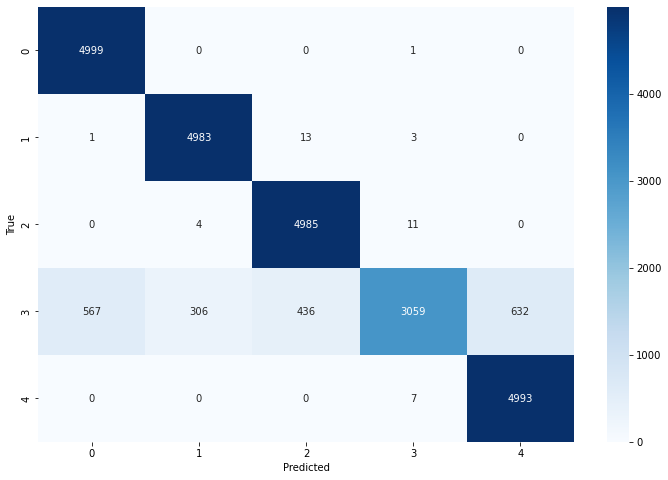

In [57]:
# confusion matrix of the predicted train data
cm = confusion_matrix(train_domains, train_domains_predict)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

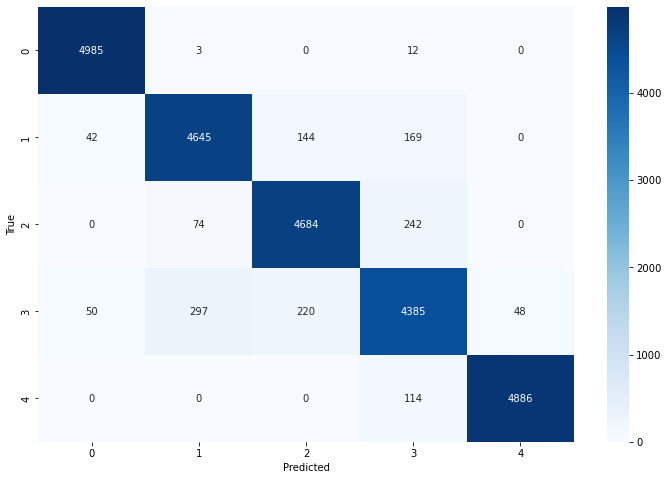

In [59]:
# confusion matrix of the predicted test data
cm = confusion_matrix(test_domains, test_domains_predict)

plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# TRAINING DIGIT (CONTENT) CLASSIFIER ON EACH DOMAIN

In [77]:
# looking for the best range of n_estimators hyperparameter in the range of (1, 1000)
prev_score = 0

for i in range(1, 1002, 50):
    # training digits classifier on each domain
    domain_digit_clfs = {}

    start_time = time.time()
    for tag in domain_tags:   
        tag_train_features = tag_train_features_dic[tag]
        tag_train_digits = tag_train_digits_dic[tag]
        
        domain_digit_clf = RandomForestClassifier(n_estimators=i, random_state=123)
        domain_digit_clf.fit(tag_train_features, tag_train_digits)

        domain_digit_clfs[tag] = domain_digit_clf
        
    end_time = time.time()
    elapsed_time = int((end_time - start_time) / 60)
   
    # clfs test
    weighted_scores = 0
    weighted_sum = 0
    for tag in domain_tags:
        tag_test_features = tag_test_features_dic[tag]
        tag_test_digits = tag_test_digits_dic[tag]
        
        tag_test_digits_predict = domain_digit_clfs[tag].predict(tag_test_features)
        score = f1_score(tag_test_digits, tag_test_digits_predict, average='weighted')
    
        weighted_scores += (score * len(tag_test_features))
        weighted_sum += len(tag_test_features)
                
    score = weighted_scores / weighted_sum
    print(f'clf with n_estimators = {i}, trained in ({elapsed_time}) minutes, accuracy = {score}')
       
    # checking whether time to train the model exeeds the limit
    # or the training has converged increasing this hyperparameter
    score_dif = score - prev_score
    
    if((elapsed_time >= train_elapsed_time_threshold) or (score_dif < converge_accuracy_difference)):
        break
        
    prev_score = score
print('---done training---')

clf with n_estimators = 1, trained in (0) minutes, accuracy = 0.5600020039272009
clf with n_estimators = 51, trained in (0) minutes, accuracy = 0.8539196550576806
clf with n_estimators = 101, trained in (0) minutes, accuracy = 0.8717486184751
clf with n_estimators = 151, trained in (1) minutes, accuracy = 0.8789017238006424
clf with n_estimators = 201, trained in (1) minutes, accuracy = 0.8817810930399231
clf with n_estimators = 251, trained in (1) minutes, accuracy = 0.8843053856667327
clf with n_estimators = 301, trained in (2) minutes, accuracy = 0.8842885483265633
clf with n_estimators = 351, trained in (2) minutes, accuracy = 0.8854258594471891


KeyboardInterrupt: 

In [81]:
# looking for the best range of min_samples_split hyperparameter in the range of (1, 1000)
prev_score = 0
n_estimators = 50

for i in range(2, 1003, 100):
    # training digits classifier on each domain
    domain_digit_clfs = {}

    start_time = time.time()
    for tag in domain_tags:   
        tag_train_features = tag_train_features_dic[tag]
        tag_train_digits = tag_train_digits_dic[tag]
        
        domain_digit_clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=i, random_state=123)
        domain_digit_clf.fit(tag_train_features, tag_train_digits)

        domain_digit_clfs[tag] = domain_digit_clf
        
    end_time = time.time()
    elapsed_time = int((end_time - start_time) / 60)
   
    # clfs test
    weighted_scores = 0
    weighted_sum = 0
    for tag in domain_tags:
        tag_test_features = tag_test_features_dic[tag]
        tag_test_digits = tag_test_digits_dic[tag]
        
        tag_test_digits_predict = domain_digit_clfs[tag].predict(tag_test_features)
        score = f1_score(tag_test_digits, tag_test_digits_predict, average='weighted')
    
        weighted_scores += (score * len(tag_test_features))
        weighted_sum += len(tag_test_features)
                
    score = weighted_scores / weighted_sum
    print(f'clf with n_estimators = {i}, trained in ({elapsed_time}) minutes, accuracy = {score}')
       
    # checking whether time to train the model exeeds the limit
    # or the training has converged increasing this hyperparameter
    score_dif = score - prev_score
    
    if(elapsed_time >= train_elapsed_time_threshold):
        break
        
    prev_score = score
print('---done training---')

clf with n_estimators = 2, trained in (0) minutes, accuracy = 0.8530367030564782
clf with n_estimators = 102, trained in (0) minutes, accuracy = 0.8256307134731351
clf with n_estimators = 202, trained in (0) minutes, accuracy = 0.7884434091356756
clf with n_estimators = 302, trained in (0) minutes, accuracy = 0.7498950622610384
clf with n_estimators = 402, trained in (0) minutes, accuracy = 0.7238352125052945
clf with n_estimators = 502, trained in (0) minutes, accuracy = 0.7046771161758948
clf with n_estimators = 602, trained in (0) minutes, accuracy = 0.6914142017182344
clf with n_estimators = 702, trained in (0) minutes, accuracy = 0.6796002511768034
clf with n_estimators = 802, trained in (0) minutes, accuracy = 0.6630377802949193
clf with n_estimators = 902, trained in (0) minutes, accuracy = 0.6415056758174238
clf with n_estimators = 1002, trained in (0) minutes, accuracy = 0.6206034631391524
---done training---


In [82]:
# looking for the best range of min_samples_split hyperparameter in the range of (1, 100)
prev_score = 0
n_estimators = 50

for i in range(2, 103, 10):
    # training digits classifier on each domain
    domain_digit_clfs = {}

    start_time = time.time()
    for tag in domain_tags:   
        tag_train_features = tag_train_features_dic[tag]
        tag_train_digits = tag_train_digits_dic[tag]
        
        domain_digit_clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=i, random_state=123)
        domain_digit_clf.fit(tag_train_features, tag_train_digits)

        domain_digit_clfs[tag] = domain_digit_clf
        
    end_time = time.time()
    elapsed_time = int((end_time - start_time) / 60)
   
    # clfs test
    weighted_scores = 0
    weighted_sum = 0
    for tag in domain_tags:
        tag_test_features = tag_test_features_dic[tag]
        tag_test_digits = tag_test_digits_dic[tag]
        
        tag_test_digits_predict = domain_digit_clfs[tag].predict(tag_test_features)
        score = f1_score(tag_test_digits, tag_test_digits_predict, average='weighted')
    
        weighted_scores += (score * len(tag_test_features))
        weighted_sum += len(tag_test_features)
                
    score = weighted_scores / weighted_sum
    print(f'clf with n_estimators = {i}, trained in ({elapsed_time}) minutes, accuracy = {score}')
       
    # checking whether time to train the model exeeds the limit
    # or the training has converged increasing this hyperparameter
    score_dif = score - prev_score
    
    if(elapsed_time >= train_elapsed_time_threshold):
        break
        
    prev_score = score
print('---done training---')

clf with n_estimators = 2, trained in (0) minutes, accuracy = 0.8530367030564782
clf with n_estimators = 12, trained in (0) minutes, accuracy = 0.8587573080352551
clf with n_estimators = 22, trained in (0) minutes, accuracy = 0.8564753952763637
clf with n_estimators = 32, trained in (0) minutes, accuracy = 0.8537813038420958
clf with n_estimators = 42, trained in (0) minutes, accuracy = 0.8535221559815008
clf with n_estimators = 52, trained in (0) minutes, accuracy = 0.8461440938060807
clf with n_estimators = 62, trained in (0) minutes, accuracy = 0.8402377163282031
clf with n_estimators = 72, trained in (0) minutes, accuracy = 0.840144860631676
clf with n_estimators = 82, trained in (0) minutes, accuracy = 0.8346284775164066
clf with n_estimators = 92, trained in (0) minutes, accuracy = 0.8315001544541731
clf with n_estimators = 102, trained in (0) minutes, accuracy = 0.8256307134731351
---done training---


In [95]:
# training digits classifier on each domain using desired hyperparameters
n_estimators = 200
min_samples_split = 20
domain_digit_clfs = {}

for tag in domain_tags:  
    tag_train_features = tag_train_features_dic[tag]
    tag_train_digits = tag_train_digits_dic[tag]
    
    domain_digit_clf = RandomForestClassifier(n_estimators=n_estimators, min_samples_split=min_samples_split, random_state=123)
    domain_digit_clf.fit(tag_train_features, tag_train_digits)
    
    save_clf(domain_digit_clf, f'{tag}_digit_clf', n_estimators=n_estimators, min_samples_split=min_samples_split)
    
    domain_digit_clfs[tag] = domain_digit_clf

In [100]:
### accuracy test of the final models ###

# accuracy on train data (split based on true domain)
weighted_score_sum = 0
weight_sum = 0
for tag in domain_tags:
    digit_clf = domain_digit_clfs[tag]
    tag_train_features = tag_train_features_dic[tag]
    tag_train_digits = tag_train_digits_dic[tag]
    
    tag_train_digits_predict = digit_clf.predict(tag_train_features)
    score = f1_score(tag_train_digits, tag_train_digits_predict, average='weighted')
    print(f'class {tag}: f1_score on train data (split based on true domain) = {score}')

    weighted_score_sum += (score * len(tag_train_features))
    weight_sum += len(tag_train_features)
    
weighted_score = (weighted_score_sum / weight_sum)
print(f'f1_score on train data (split based on true domain) = {weighted_score}')

# accuracy on train data (split based on predicted domain)
print()
train_domains_predict = domain_clf.predict(train_features)
weighted_score_sum = 0
weight_sum = 0

for tag in domain_tags:
    digit_clf = domain_digit_clfs[tag]
    tag_train_features = train_features[train_domains_predict == tag]
    tag_train_digits = train_digits[train_domains_predict == tag]
    
    tag_train_digits_predict = digit_clf.predict(tag_train_features)
    score = f1_score(tag_train_digits, tag_train_digits_predict, average='weighted')
    print(f'class {tag}: f1_score on train data (split based on predicted domain) = {score}')

    weighted_score_sum += (score * len(tag_train_features))
    weight_sum += len(tag_train_features)
    
weighted_score = (weighted_score_sum / weight_sum)
print(f'f1_score on train data (split based on predicted domain) = {weighted_score}')

# accuracy on test data (split based on true domain)
print()
weighted_score_sum = 0
weight_sum = 0
for tag in domain_tags:
    digit_clf = domain_digit_clfs[tag]
    tag_test_features = tag_test_features_dic[tag]
    tag_test_digits = tag_test_digits_dic[tag]
    
    tag_test_digits_predict = digit_clf.predict(tag_test_features)
    score = f1_score(tag_test_digits, tag_test_digits_predict, average='weighted')
    print(f'class {tag}: f1_score on test data (split based on true domain) = {score}')

    weighted_score_sum += (score * len(tag_test_features))
    weight_sum += len(tag_test_features)
    
weighted_score = (weighted_score_sum / weight_sum)
print(f'f1_score on test data (split based on true domain) = {weighted_score}')


# accuracy on test data (split based on predicted domain)
print()
test_domains_predict = domain_clf.predict(test_features)
weighted_score_sum = 0
weight_sum = 0
for tag in domain_tags:
    digit_clf = domain_digit_clfs[tag]
    tag_test_features = test_features[test_domains_predict == tag]
    tag_test_digits = test_digits[test_domains_predict == tag]
    
    tag_test_digits_predict = digit_clf.predict(tag_test_features)
    score = f1_score(tag_test_digits, tag_test_digits_predict, average='weighted')
    print(f'class {tag}: f1_score on test data (split based on predicted domain) = {score}')

    weighted_score_sum += (score * len(tag_test_features))
    weight_sum += len(tag_test_features)
    
weighted_score = (weighted_score_sum / weight_sum)
print(f'f1_score on test data (split based on predicted domain) = {weighted_score}')

class 0: f1_score on train data (split based on true domain) = 0.9987995651372393
class 1: f1_score on train data (split based on true domain) = 0.9987995037175855
class 2: f1_score on train data (split based on true domain) = 0.9944079277629717
class 3: f1_score on train data (split based on true domain) = 0.9989997880088513
class 4: f1_score on train data (split based on true domain) = 0.9996000273116841
f1_score on train data (split based on true domain) = 0.9981213623876665

class 0: f1_score on train data (split based on predicted domain) = 0.9967633711534225
class 1: f1_score on train data (split based on predicted domain) = 0.9926309468536039
class 2: f1_score on train data (split based on predicted domain) = 0.9693810675044698
class 3: f1_score on train data (split based on predicted domain) = 0.9983767696734978
class 4: f1_score on train data (split based on predicted domain) = 0.9989333012693208
f1_score on train data (split based on predicted domain) = 0.9906237062692197

cl